# Introducción

En este análisis, nos proponemos explorar la causalidad en las predicciones obtenidas a través del análisis SHAP. Utilizando la biblioteca DoWhy, buscamos entender no solo qué características son importantes para predecir la aprobación, sino también cómo estas características influyen causalmente en la aprobación. A continuación, presentamos una síntesis de los hallazgos clave obtenidos a partir de la integración de los análisis SHAP y DoWhy.

## Análisis de Características Principales con SHAP

Inicialmente, realizamos un análisis con SHAP para identificar las características más relevantes que afectan la probabilidad de aprobación. Según este análisis, las características más influyentes son:

- `hito1`
- `e29`
- `exitosos`
- `fallidos`
- `e42`
- `e3`
- `e35`
- `e13`
- `e26`
- `e18`
- `e32`
- `e10`
- `e0`
- `e4`
- `e23`
- `e7`
- `e17`
- `e25`
- `e22`
- `e8`

Estas características fueron identificadas como las más críticas, excluyendo `hito2` y otras columnas no listadas.

## Integración con Análisis de Causalidad DoWhy

Para profundizar nuestro entendimiento, integramos los insights obtenidos a través de SHAP con un análisis de causalidad utilizando DoWhy. Este análisis nos permite investigar cómo las características identificadas como importantes por SHAP influyen causalmente en la aprobación.

A través de este análisis de causalidad, buscamos responder preguntas cruciales como:

1. ¿Cómo la variación en `e42` afecta directa e indirectamente la aprobación?
2. ¿Cómo los efectos causales identificados pueden influir en la estrategia de intervención para mejorar las tasas de aprobación?


In [2]:
import dowhy
from dowhy import CausalModel
from sklearn.ensemble import RandomForestRegressor
import dowhy.causal_estimators.linear_regression_estimator

import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
from sys import path
import os

for dirname, _, filenames in os.walk("../../../resources/"):
    for filename in filenames:
        print(os.path.join(dirname, filename))
path.append(os.path.realpath("../../../"))

from custom import functions

warnings.filterwarnings("ignore")

../../../resources/allColProSol.xlsx
../../../resources/dataset_a_2021.csv
../../../resources/dataset_a_2021c2.csv
../../../resources/dataset_a_2021v1.xlsx
../../../resources/dataset_unab_ORIGINAL SIN P1.csv
../../../resources/dataset_unab_P1.csv
../../../resources/exitoFallidoEnviosProgramaSol.xlsx
../../../resources/exitoFallidoProgramaSol.xlsx
../../../resources/exitosoFallidosEnviosAllColProSol.xlsx
../../../resources/exitosoFallidosEnviosAllColSol.xlsx
../../../resources/exitososFallidosEnviosSol.xlsx
../../../resources/Hito12sinColCeroExitosoFallidosSol.xlsx
../../../resources/sinColCeroExitosoFallidosEnviosSol.xlsx
../../../resources/sinColCeroExitosoFallidosSol.xlsx
../../../resources/v2_hitosExitoFalloColESol1.csv
../../../resources/v2_hitosExitoFalloColESol1Prograna.csv
../../../resources/v2_hitosExitoFalloSol1Programa.csv
../../../resources/causalidad\causalidad.dot
../../../resources/causalidad\causalidad.png
../../../resources/causalidad\causalidad_e29.dot
../../../resourc

In [3]:
# Read and preview data
df = pd.read_csv(
    "../../../resources/v2_hitosExitoFalloColESol1.csv",
    delimiter=";",
    skipinitialspace=True,
)

In [4]:
# creando columna aprobado y con la funcion set_in_aprobado_nota poblamos la nueva columna.
df["aprobado"] = df.apply(lambda x: functions.set_in_aprobado_nota(x["sol1"]), axis=1)
# revisamos la existencia de la nueva columna.
print(df.columns)

Index(['hito1', 'hito2', 'exitosos', 'fallidos', 'e0', 'e1', 'e2', 'e3', 'e4',
       'e5', 'e6', 'e7', 'e8', 'e9', 'e10', 'e11', 'e12', 'e13', 'e14', 'e15',
       'e16', 'e17', 'e18', 'e19', 'e20', 'e21', 'e22', 'e23', 'e24', 'e25',
       'e26', 'e27', 'e28', 'e29', 'e30', 'e31', 'e32', 'e33', 'e34', 'e35',
       'e36', 'e37', 'e38', 'e39', 'e40', 'e41', 'e42', 'e43', 'e44', 'e45',
       'e46', 'e47', 'e48', 'e49', 'e50', 'e51', 'e52', 'sol1', 'aprobado'],
      dtype='object')


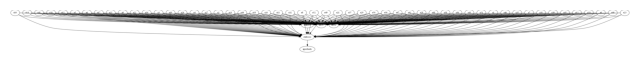

In [5]:
# Paso 1: Modelar un problema causal
model = CausalModel(
    data=df,
    treatment="e42",
    outcome="aprobado",
    graph="""
    digraph {
        e0 -> exitosos;
        e0 -> fallidos;
        e0 -> hito1;
        e0 -> hito2;

        e1 -> fallidos;
        e1 -> hito1;
        e1 -> hito2;
        e1 -> exitosos;

        e2 -> exitosos;
        e2 -> fallidos;
        e2 -> hito1;
        e2 -> hito2;

        e3 -> exitosos;
        e3 -> fallidos;
        e3 -> hito1;
        e3 -> hito2;

        e4 -> exitosos;
        e4 -> fallidos;
        e4 -> hito1;
        e4 -> hito2;

        e5 -> exitosos;
        e5 -> fallidos;
        e5 -> hito1;
        e5 -> hito2;

        e6 -> exitosos;
        e6 -> fallidos;
        e6 -> hito1;
        e6 -> hito2;

        e7 -> exitosos;
        e7 -> fallidos;
        e7 -> hito1;
        e7 -> hito2;

        e8 -> exitosos;
        e8 -> fallidos;
        e8 -> hito1;
        e8 -> hito2;

        e9 -> exitosos;
        e9 -> fallidos;
        e9 -> hito1;
        e9 -> hito2;

        e10 -> exitosos;
        e10 -> fallidos;
        e10 -> hito1;
        e10 -> hito2;

        e11 -> exitosos;
        e11 -> fallidos;
        e11 -> hito1;
        e11 -> hito2;

        e12 -> exitosos;
        e12 -> fallidos;
        e12 -> hito1;
        e12 -> hito2;

        e13 -> exitosos;
        e13 -> fallidos;
        e13 -> hito1;
        e13 -> hito2;

        e13 -> exitosos;
        e13 -> fallidos;
        e13 -> hito1;
        e13 -> hito2;

        e14 -> exitosos;
        e14 -> fallidos;
        e14 -> hito1;
        e14 -> hito2;

        e15 -> exitosos;
        e15 -> fallidos;
        e15 -> hito1;
        e15 -> hito2;

        e17 -> exitosos;
        e17 -> fallidos;
        e17 -> hito1;
        e17 -> hito2;

        e18 -> exitosos;
        e18 -> fallidos;
        e18 -> hito1;
        e18 -> hito2;

        e19 -> exitosos;
        e19 -> fallidos;
        e19 -> hito1;
        e19 -> hito2;

        e20 -> exitosos;
        e20 -> fallidos;
        e20 -> hito1;
        e20 -> hito2;

        e21 -> exitosos;
        e21 -> fallidos;
        e21 -> hito1;
        e21 -> hito2;

        e22 -> exitosos;
        e22 -> fallidos;
        e22 -> hito1;
        e22 -> hito2;

        e23 -> exitosos;
        e23 -> fallidos;
        e23 -> hito1;
        e23 -> hito2;

        e24 -> exitosos;
        e24 -> fallidos;
        e24 -> hito1;
        e24 -> hito2;

        e25 -> exitosos;
        e25 -> fallidos;
        e25 -> hito1;
        e25 -> hito2;

        e26 -> exitosos;
        e26 -> fallidos;
        e26 -> hito1;
        e26 -> hito2;

        e27 -> exitosos;
        e27 -> fallidos;
        e27 -> hito1;
        e27 -> hito2;

        e28 -> exitosos;
        e28 -> fallidos;
        e28 -> hito1;
        e28 -> hito2;

        e29 -> exitosos;
        e29 -> fallidos;
        e29 -> hito1;
        e29 -> hito2;

        e30 -> exitosos;
        e30 -> fallidos;
        e30 -> hito1;
        e30 -> hito2;

        e31 -> exitosos;
        e31 -> fallidos;
        e31 -> hito1;
        e31 -> hito2;

        e32 -> exitosos;
        e32 -> fallidos;
        e32 -> hito1;
        e32 -> hito2;

        e33 -> exitosos;
        e33 -> fallidos;
        e33 -> hito1;
        e33 -> hito2;

        e34 -> exitosos;
        e34 -> fallidos;
        e34 -> hito1;
        e34 -> hito2;

        e35 -> exitosos;
        e35 -> fallidos;
        e35 -> hito1;
        e35 -> hito2;

        e36 -> exitosos;
        e36 -> fallidos;
        e36 -> hito1;
        e36 -> hito2;

        e37 -> exitosos;
        e37 -> fallidos;
        e37 -> hito1;
        e37 -> hito2;

        e38 -> exitosos;
        e38 -> fallidos;
        e38 -> hito1;
        e38 -> hito2;

        e39 -> exitosos;
        e39 -> fallidos;
        e39 -> hito1;
        e39 -> hito2;

        e40 -> exitosos;
        e40 -> fallidos;
        e40 -> hito1;
        e40 -> hito2;

        e41 -> exitosos;
        e41 -> fallidos;
        e41 -> hito1;
        e41 -> hito2;

        e42 -> exitosos;
        e42 -> fallidos;
        e42 -> hito1;
        e42 -> hito2;

        e43 -> exitosos;
        e43 -> fallidos;
        e43 -> hito1;
        e43 -> hito2;

        e44 -> exitosos;
        e44 -> fallidos;
        e44 -> hito1;
        e44 -> hito2;

        e45 -> exitosos;
        e45 -> fallidos;
        e45 -> hito1;
        e45 -> hito2;

        e46 -> exitosos;
        e46 -> fallidos;
        e46 -> hito1;
        e46 -> hito2;

        e47 -> exitosos;
        e47 -> fallidos;
        e47 -> hito1;
        e47 -> hito2;

        e48 -> exitosos;
        e48 -> fallidos;
        e48 -> hito1;
        e48 -> hito2;

        e49 -> exitosos;
        e49 -> fallidos;
        e49 -> hito1;
        e49 -> hito2;

        e50 -> exitosos;
        e50 -> fallidos;
        e50 -> hito1;
        e50 -> hito2;

        e51 -> exitosos;
        e51 -> fallidos;
        e51 -> hito1;
        e51 -> hito2;

        e52 -> exitosos;
        e52 -> fallidos;
        e52 -> hito1;
        e52 -> hito2;



        fallidos -> exitosos;
        exitosos -> aprobado; 
    }
    """,
)


# Visualizar el modelo causal con la variable de causa común no observada
model.view_model(
    layout="dot",
    file_name="../../../resources/causalidad/analisis_preguntas/graph_causal_model_e42_es_full",
)

In [6]:
# Paso 2: Identificar el estimando objetivo bajo el modelo
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand)

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
  d                
──────(E[aprobado])
d[e₄₂]             
Estimand assumption 1, Unconfoundedness: If U→{e42} and U→aprobado then P(aprobado|e42,,U) = P(aprobado|e42,)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
Estimand expression:
 ⎡     d                  d               ⎤
E⎢───────────(aprobado)⋅──────([exitosos])⎥
 ⎣d[exitosos]           d[e₄₂]            ⎦
Estimand assumption 1, Full-mediation: exitosos intercepts (blocks) all directed paths from e42 to a,p,r,o,b,a,d,o.
Estimand assumption 2, First-stage-unconfoundedness: If U→{e42} and U→{exitosos} then P(exitosos|e42,U) = P(exitosos|e42)
Estimand assumption 3, Second-stage-unconfoundedness: If U→{exitosos} and U→aprobado then P(aprobado|exitosos, e42, U) = P(aprobado|exitosos, e42)



In [7]:
# Paso 3: Estimar el efecto causal usando un método basado en árboles
estimate = model.estimate_effect(
    identified_estimand,
    method_name="backdoor.econml.dml.DML",
    control_value=0,
    treatment_value=1,
    target_units="ate",  # Average Treatment Effect
    method_params={
        "init_params": {
            "model_y": RandomForestRegressor(),
            "model_t": RandomForestRegressor(),
            "model_final": RandomForestRegressor(
                max_depth=10,
                min_samples_split=10,
                min_samples_leaf=5,
                random_state=1502,
                n_estimators=500,
            ),
            "featurizer": None,
        },
        "fit_params": {},
    },
)

print("----------------------------")
print("Estimado de efecto causal:")
print(estimate.value)
print("----------------------------")

----------------------------
Estimado de efecto causal:
0.10939406078138936
----------------------------


Dado que el estimado es positivo (0.10939406078138936), esto sugiere que hay una relacion positiva entre la variable de tratamiento y la variable de resultado, donde la Magnitud del 0.10.. lo que se puede interpretar como que, en promedio, un incremento unitario en la variable 'e42', esta asociado con un incremento de 0.24 en la variable 'aprobado'.


In [8]:
# Refutador de datos aleatorios
refute1 = model.refute_estimate(
    identified_estimand, estimate, method_name="random_common_cause"
)
print(refute1)

Refute: Add a random common cause
Estimated effect:0.10939406078138936
New effect:0.04540375005339141
p value:0.38



El nuevo estimado del efecto causal despues de añadir la causa comun aleatoria, siendo un numero significativamente diferente del estimado origianl, podria sugerir que el estimado original noes muy robusto.

Un valor p grande (generalmente mayor a 0.05) sugiere que los cambios en el estimado del efecto causal no son estadísticamente significativos, lo que en este caso podría sugerir que el estimado original es relativamente robusto a la adición de una nueva causa común aleatoria. Sin embargo, un valor p de 0.38 no es extremadamente alto, por lo que hay cierta evidencia de que la adición de la causa común aleatoria ha afectado el estimado del efecto causal, aunque no de manera estadísticamente significativa.


In [9]:
# Refutador de causa común no observada
refute2 = model.refute_estimate(
    identified_estimand,
    estimate,
    method_name="add_unobserved_common_cause",
    confounders_effect_on_treatment="binary_flip",
    confounders_effect_on_outcome="binary_flip",
    effect_strength_on_treatment=0.01,
    effect_strength_on_outcome=0.02,
)
print(refute2)

Refute: Add an Unobserved Common Cause
Estimated effect:0.10939406078138936
New effect:0.22520844379358745



Este es el nuevo estimado del efecto causal después de añadir la causa común no observada. Como puedes ver, el nuevo efecto es bastante más grande que el estimado original. Esto sugiere que la presencia de una causa común no observada puede tener un impacto significativo en tu estimado del efecto causal, y que tu estimado original podría estar subestimando el verdadero efecto causal


In [10]:
# Paso 4: Refutar el estimado obtenido
refute3 = model.refute_estimate(
    identified_estimand,
    estimate,
    method_name="placebo_treatment_refuter",
    placebo_type="permute",
)
print(refute3)

Refute: Use a Placebo Treatment
Estimated effect:0.10939406078138936
New effect:0.008763075027256817
p value:0.9199999999999999



In [12]:
# Natural direct effect (nde)
identified_estimand_nde = model.identify_effect(
    estimand_type="nonparametric-nde",
    proceed_when_unidentifiable=True,
)
print(identified_estimand_nde)

Estimand type: EstimandType.NONPARAMETRIC_NDE

### Estimand : 1
Estimand name: mediation
Estimand expression:
 ⎡  d                      ⎤
E⎢──────(aprobado|fallidos)⎥
 ⎣d[e₄₂]                   ⎦
Estimand assumption 1, Mediation: fallidos intercepts (blocks) all directed paths from e42 to a,p,r,o,b,a,d,o except the path {e42}→{a,p,r,o,b,a,d,o}.
Estimand assumption 2, First-stage-unconfoundedness: If U→{e42} and U→{fallidos} then P(fallidos|e42,U) = P(fallidos|e42)
Estimand assumption 3, Second-stage-unconfoundedness: If U→{fallidos} and U→aprobado then P(aprobado|fallidos, e42, U) = P(aprobado|fallidos, e42)



In [13]:
causal_estimate_nde = model.estimate_effect(
    identified_estimand_nde,
    method_name="mediation.two_stage_regression",
    confidence_intervals=False,
    test_significance=False,
    method_params={
        "first_stage_model": dowhy.causal_estimators.linear_regression_estimator.LinearRegressionEstimator,
        "second_stage_model": dowhy.causal_estimators.linear_regression_estimator.LinearRegressionEstimator,
    },
)
print(causal_estimate_nde)

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_NDE

### Estimand : 1
Estimand name: mediation
Estimand expression:
 ⎡  d                      ⎤
E⎢──────(aprobado|fallidos)⎥
 ⎣d[e₄₂]                   ⎦
Estimand assumption 1, Mediation: fallidos intercepts (blocks) all directed paths from e42 to a,p,r,o,b,a,d,o except the path {e42}→{a,p,r,o,b,a,d,o}.
Estimand assumption 2, First-stage-unconfoundedness: If U→{e42} and U→{fallidos} then P(fallidos|e42,U) = P(fallidos|e42)
Estimand assumption 3, Second-stage-unconfoundedness: If U→{fallidos} and U→aprobado then P(aprobado|fallidos, e42, U) = P(aprobado|fallidos, e42)

## Realized estimand
(b: aprobado~e42+e42*e37+e42*e39+e42*e41+e42*e12+e42*e29+e42*e32+e42*e10+e42*e51+e42*e22+e42*e21+e42*e38+e42*e3+e42*e33+e42*e45+e42*e47+e42*e4+e42*e28+e42*e44+e42*e36+e42*e5+e42*e43+e42*e46+e42*e23+e42*e2+e42*e34+e42*e31+e42*e50+e42*e1+e42*e19+e42*e40+e42*e13+e42*e27+e42*e48+e42*e52+e42*e49+e42*e7+e42*e18+e42*e2

In [14]:
# Natural indirect effect (nie)
identified_estimand_nie = model.identify_effect(
    estimand_type="nonparametric-nie", proceed_when_unidentifiable=True
)
print(identified_estimand_nie)

Estimand type: EstimandType.NONPARAMETRIC_NIE

### Estimand : 1
Estimand name: mediation
Estimand expression:
 ⎡     d                  d               ⎤
E⎢───────────(aprobado)⋅──────([fallidos])⎥
 ⎣d[fallidos]           d[e₄₂]            ⎦
Estimand assumption 1, Mediation: fallidos intercepts (blocks) all directed paths from e42 to a,p,r,o,b,a,d,o except the path {e42}→{a,p,r,o,b,a,d,o}.
Estimand assumption 2, First-stage-unconfoundedness: If U→{e42} and U→{fallidos} then P(fallidos|e42,U) = P(fallidos|e42)
Estimand assumption 3, Second-stage-unconfoundedness: If U→{fallidos} and U→aprobado then P(aprobado|fallidos, e42, U) = P(aprobado|fallidos, e42)



In [15]:
causal_estimate_nie = model.estimate_effect(
    identified_estimand_nie,
    method_name="mediation.two_stage_regression",
    confidence_intervals=False,
    test_significance=False,
    method_params={
        "first_stage_model": dowhy.causal_estimators.linear_regression_estimator.LinearRegressionEstimator,
        "second_stage_model": dowhy.causal_estimators.linear_regression_estimator.LinearRegressionEstimator,
    },
)
print(causal_estimate_nie)

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_NIE

### Estimand : 1
Estimand name: mediation
Estimand expression:
 ⎡     d                  d               ⎤
E⎢───────────(aprobado)⋅──────([fallidos])⎥
 ⎣d[fallidos]           d[e₄₂]            ⎦
Estimand assumption 1, Mediation: fallidos intercepts (blocks) all directed paths from e42 to a,p,r,o,b,a,d,o except the path {e42}→{a,p,r,o,b,a,d,o}.
Estimand assumption 2, First-stage-unconfoundedness: If U→{e42} and U→{fallidos} then P(fallidos|e42,U) = P(fallidos|e42)
Estimand assumption 3, Second-stage-unconfoundedness: If U→{fallidos} and U→aprobado then P(aprobado|fallidos, e42, U) = P(aprobado|fallidos, e42)

## Realized estimand
(b: fallidos~e42+e42*e37+e42*e39+e42*e41+e42*e12+e42*e29+e42*e32+e42*e10+e42*e51+e42*e22+e42*e21+e42*e38+e42*e3+e42*e33+e42*e45+e42*e47+e42*e4+e42*e28+e42*e44+e42*e36+e42*e5+e42*e43+e42*e46+e42*e23+e42*e2+e42*e34+e42*e31+e42*e50+e42*e1+e42*e19+e42*e40+e42*e13+e42*e27+